# librosa test

librosa is a powerful module in python to process .wav files. We can use this module to get a .wav file's information.

In [30]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# basic
data, sample_rate = librosa.load("./348588_2.wav",sr=None)
data
sample_rate # the default sample rate of librosa is 22050. Also we can use default or specified sample rate.

44100

In [31]:
# spectrogram
spectrogram = librosa.feature.melspectrogram(y=data,sr=sample_rate)
spectrogram

array([[2.5758486e-02, 5.9336703e-03, 5.2224868e-04, ..., 8.8515633e-04,
        2.2295280e-03, 1.2869264e-03],
       [4.2936251e-02, 1.2102291e-02, 1.1022423e-03, ..., 1.5539031e-03,
        4.3987287e-03, 7.8603346e-03],
       [5.9747960e-02, 1.7717805e-02, 2.2758334e-03, ..., 8.2996311e-03,
        5.5799359e-03, 9.9939723e-03],
       ...,
       [1.2625463e-07, 3.2410082e-08, 1.1245812e-09, ..., 1.3783091e-09,
        1.2836520e-09, 2.0478130e-09],
       [1.2289408e-07, 3.1775656e-08, 1.0719524e-09, ..., 1.3834034e-09,
        1.4630011e-09, 2.1740825e-09],
       [1.2892518e-07, 3.3018377e-08, 1.2908276e-09, ..., 1.0845803e-09,
        1.2722238e-09, 1.3814592e-09]], dtype=float32)

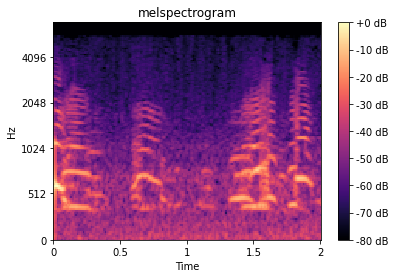

In [32]:
# plot the spectrogram
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(spectrogram,ref=np.max)
img = librosa.display.specshow(S_dB,x_axis='time',y_axis='mel',sr=sample_rate,fmax=7000,ax=ax)
fig.colorbar(img,ax=ax,format='%+2.0f dB')
ax.set(title="melspectrogram")
plt.show()

In [ ]:
# direct plot the spectrogram

In [ ]:
# MFCC (梅尔频率倒谱系数)
# mel频率分析基于人类听觉感知实验。只关注人类耳朵可以听到的频率分量
mfcc = librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=40)
mfcc.shape